## ML Challenge WS 2022/23

#### Task:

Your Task is to train a clickbait filter to classify clickbait articles by their headline. You freely decide how to prepare the data and which ML model to use for classification.

The challenge is considered passed if your model performs better than our baseline (a simple classifier; F1 ~0.89). Report at least the F1 score of your classifier. Your model will be evaluated using a hold out dataset. Please prepare a script so your trained model can be evaluated with this dataset.

#### Dataset:

The data consists of two files, a text file with clickbait headlines and one with headlines from news sources. The hold out dataset is organized the same way.

# IMPORTING PACKAGES

In [1]:
!pip install wordcloud 

In [2]:
import re
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
import spacy 
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report,f1_score

# LOADING AND EDA

In [3]:
# read the txt file and store each line as a list element
with open('clickbait_no.txt', 'r' ,encoding='utf-8-sig') as file:
    lines = file.readlines()

# convert the list into a dataframe
clickbait_no = pd.DataFrame(lines, columns=['text'])

# print the dataframe
clickbait_no.head()

clickbait_no['Label']  = 0
clickbait_no.head()

,text,Label
0,Soccer Provides Oasis in Mexican City Ravaged ...,0
1,Five police officers injured in Naples protest...,0
2,International experts probe deadly Ebola Resto...,0
3,UK elections: Gordon Brown offers resignation ...,0
4,Eric Bogosian on writing and the creative urge\n,0


In [4]:
# read the txt file and store each line as a list element
with open('clickbait_yes.txt', 'r' ,encoding='utf-8-sig') as file:
    lines = file.readlines()

# convert the list into a dataframe
clickbait_yes = pd.DataFrame(lines, columns=['text'])

# print the dataframe
clickbait_yes.head()

clickbait_yes['Label']  = 1
clickbait_yes.head()

,text,Label
0,Guys Try Tinder\n,1
1,Michael B. Jordan Got Laid The Fuck Out While ...,1
2,What's The Most Fucked Up Thing You've Done On...,1
3,How Far Would You Make It In The Hunger Games\n,1
4,If Matthew Gray Gubler's Tweets Were Motivatio...,1


In [5]:
frames = [clickbait_yes, clickbait_no]
df = pd.concat(frames)
df.head()

,text,Label
0,Guys Try Tinder\n,1
1,Michael B. Jordan Got Laid The Fuck Out While ...,1
2,What's The Most Fucked Up Thing You've Done On...,1
3,How Far Would You Make It In The Hunger Games\n,1
4,If Matthew Gray Gubler's Tweets Were Motivatio...,1


In [6]:
df['Label'].value_counts()

0    14465
1    14335
Name: Label, dtype: int64

In [7]:
df.isnull().sum()

text     0
Label    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

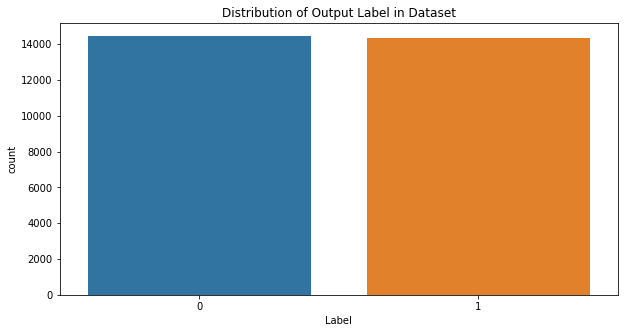

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(x= 'Label', data=df)
plt.title('Distribution of Output Label in Dataset')
plt.show

# DATA PRECOESSING

In [9]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
stops = STOP_WORDS

# For Removing Special Characters 
spec_chara = re.compile('[/(){}\[\]\|@,;]')

# For Removing Extra Symbols
ext_sym = re.compile('[^0-9a-z #+_]')

In [10]:
def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
        comment = spec_chara.sub(' ', comment)
        comment = ext_sym.sub('', comment)
        
    comment = nlp(comment)
    lemmatized = list()
    
# Loop for Lemmatization
    for word in comment:
        token = [token for token in comment]
        lemma = word.lemma_.strip()
        
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
            
    return " ".join(lemmatized)

In [11]:
df['Cleaned_Text'] = df['text'].apply(normalize, lowercase=True, remove_stopwords=True)

In [12]:
df.head()

,text,Label,Cleaned_Text
0,Guys Try Tinder\n,1,guys try tinder
1,Michael B. Jordan Got Laid The Fuck Out While ...,1,michael b jordan got laid fuck filming creed
2,What's The Most Fucked Up Thing You've Done On...,1,s fucked thing ve rollercoaster tycoon
3,How Far Would You Make It In The Hunger Games\n,1,far hunger games
4,If Matthew Gray Gubler's Tweets Were Motivatio...,1,matthew gray gublers tweets motivational posters


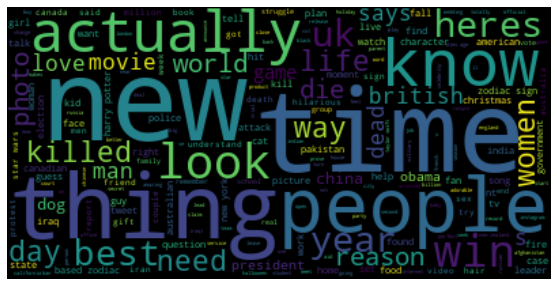

In [13]:
plt.figure(figsize=(10,5))

text = ' '.join(df['Cleaned_Text'])

# Create the wordcloud object
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# PREPROCESSING FOR ML MODEL

In [14]:
x = df['Cleaned_Text']
y = df['Label']

In [15]:

Tfid = TfidfVectorizer(max_features=3000)

In [16]:
x = Tfid.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

# MACHINE LEARNING MODEL

In [17]:

log = LogisticRegression(solver='liblinear', penalty='l1')

model = log.fit(X_train,y_train)

y_pred = log.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print(f"Test Accuracy of Model: {acc}")

f1 = f1_score(y_test,y_pred)
print(f"Test F1_score of Model: {acc}")

Test Accuracy of Model: 0.9299768518518519
Test F1_score of Model: 0.9299768518518519


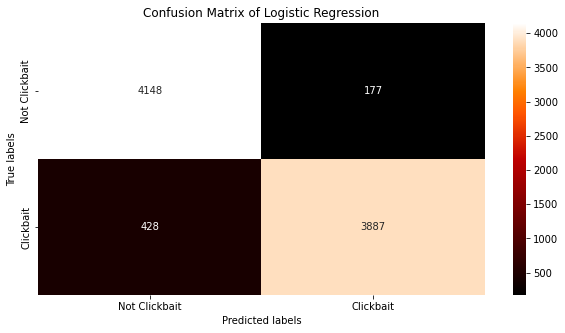

In [18]:
plt.figure(figsize=(10,5))
ax= plt.subplot()
cm = confusion_matrix(y_test,y_pred ) #confusion matrix on test data 
sns.heatmap(cm, annot=True, fmt='g', cmap="gist_heat", ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix of Logistic Regression'); 
ax.xaxis.set_ticklabels(['Not Clickbait','Clickbait']); ax.yaxis.set_ticklabels(['Not Clickbait','Clickbait']);

plt.show()

In [19]:
print(classification_report(y_pred, y_test,target_names= ['Not Clickbait','Clickbait']))

               precision    recall  f1-score   support

Not Clickbait       0.96      0.91      0.93      4576
    Clickbait       0.90      0.96      0.93      4064

     accuracy                           0.93      8640
    macro avg       0.93      0.93      0.93      8640
 weighted avg       0.93      0.93      0.93      8640



# Prediction

In [20]:
test = pd.read_csv('clickbait_hold_X.csv')
test.head()

,Text
0,How To Make The Ultimate Spaghetti With Red Sauce
1,Soviet human rights activist Yelena Bonner die...
2,Someone Calculated How Much Money Jim Spent Pr...
3,Demonstrators clash with police in Algeria aft...
4,This Color Quiz Will Tell You Which Husky Shou...


In [21]:
test.shape

(3200, 1)

In [22]:
test['Cleaned_Text'] = test['Text'].apply(normalize, lowercase=True, remove_stopwords=True)

In [23]:
feature = test['Cleaned_Text']

In [24]:
feature_transform = Tfid.fit_transform(feature)

In [25]:
prediction = log.predict(feature_transform)
prediction = pd.DataFrame({'Prediction': prediction})

In [26]:
predict_data = pd.concat([test, prediction],  axis=1)
predict_data

,Text,Cleaned_Text,Prediction
0,How To Make The Ultimate Spaghetti With Red Sauce,ultimate spaghetti red sauce,0
1,Soviet human rights activist Yelena Bonner die...,soviet human rights activist yelena bonner die...,0
2,Someone Calculated How Much Money Jim Spent Pr...,calculated money jim spent pranking dwight off...,0
3,Demonstrators clash with police in Algeria aft...,demonstrators clash police algeria slum protest,0
4,This Color Quiz Will Tell You Which Husky Shou...,color quiz tell husky bff,0
...,...,...,...
3195,WHO: H1N1 influenza virus still a pandemic,h1n1 influenza virus pandemic,0
3196,No More Surprises as Marist Women Assume Highe...,surprises marist women assume higher profile,0
3197,Japan raises severity level of crisis; efforts...,japan raises severity level crisis efforts coo...,1
3198,14 Women Who Pushed Their Boob Potential To Th...,14 women pushed boob potential limit,1


#### Questions?

[kuglerk@uni-trier.de](mailto:kuglerk@uni-trier.de?subject=ML%20Challenge%20NLU)